In [1]:
#imports padrões
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

#carregando os datasets
features=pd.read_csv(r"C:\Users\Paulo\Desktop\keggle\features.csv")
samples=pd.read_csv(r"C:\Users\Paulo\Desktop\keggle\sampleSubmission.csv")
stores=pd.read_csv(r"C:\Users\Paulo\Desktop\keggle\stores.csv")
test=pd.read_csv(r"C:\Users\Paulo\Desktop\keggle\test.csv")
train=pd.read_csv(r"C:\Users\Paulo\Desktop\keggle\train.csv") 

# > > **Análise exploratória de dados**

In [24]:
print("features\n")
features.info()
print("\nlojas\n")
stores.info()
print("\ntrain\n")
train.info()
print("\ntest\n")
test.info()

features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB

lojas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB

train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):


* Podemos perceber que os dados de treino e teste estão completos (nenhuma linha completamente nula).
* Temos dados separados e espalhados entre os dataframes, como por exemplo o tipo e tamanho da loja; ou o fato do valor das vendas estar separado das features. Além disto, somente temos o valor de venda por departamento.
* Percebe-se também que as datas estão escritas como strings

In [25]:
stores.head(10)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
5      6    A  202505
6      7    B   70713
7      8    A  155078
8      9    B  125833
9     10    B  126512

In [26]:
features.head(10)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   
5      1  2010-03-12        57.79       2.667        NaN        NaN   
6      1  2010-03-19        54.58       2.720        NaN        NaN   
7      1  2010-03-26        51.45       2.732        NaN        NaN   
8      1  2010-04-02        62.27       2.719        NaN        NaN   
9      1  2010-04-09        65.86       2.770        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
5        NaN        NaN        NaN  211.380643         8.106      False  
6        NaN        NaN        NaN  211.215635         8.106      False  
7        NaN        NaN        NaN  211.018042         8.106      False  
8        NaN        NaN        NaN  210.820450         7.808      False  
9        NaN        NaN        NaN  210.622857         7.808      False

In [27]:
train.head(10)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
5      1     1  2010-03-12      21043.39      False
6      1     1  2010-03-19      22136.64      False
7      1     1  2010-03-26      26229.21      False
8      1     1  2010-04-02      57258.43      False
9      1     1  2010-04-09      42960.91      False

In [28]:
test.head(10)

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False
5      1     1  2012-12-07      False
6      1     1  2012-12-14      False
7      1     1  2012-12-21      False
8      1     1  2012-12-28       True
9      1     1  2013-01-04      False

In [29]:
train.tail()
#para verificar se o teste é a continuação do train

Store  Dept        Date  Weekly_Sales  IsHoliday
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

In [30]:
#verificando como é a distribuição dos departamentos pelas lojas:
departamentos=[]
for i in range(1,46): #numero de lojas
    print("quantidade de departamentos na loja",i,":",train[train["Store"]==i]["Dept"].nunique())
    departamentos.append(train[train["Store"]==i]["Dept"].nunique())
print ("\nquantidade máxima e mínima de departamentos (respectivamente):",max(departamentos),min(departamentos))

quantidade de departamentos na loja 1 : 77
quantidade de departamentos na loja 2 : 78
quantidade de departamentos na loja 3 : 72
quantidade de departamentos na loja 4 : 78
quantidade de departamentos na loja 5 : 72
quantidade de departamentos na loja 6 : 77
quantidade de departamentos na loja 7 : 76
quantidade de departamentos na loja 8 : 76
quantidade de departamentos na loja 9 : 73
quantidade de departamentos na loja 10 : 77
quantidade de departamentos na loja 11 : 78
quantidade de departamentos na loja 12 : 75
quantidade de departamentos na loja 13 : 79
quantidade de departamentos na loja 14 : 77
quantidade de departamentos na loja 15 : 79
quantidade de departamentos na loja 16 : 76
quantidade de departamentos na loja 17 : 76
quantidade de departamentos na loja 18 : 78
quantidade de departamentos na loja 19 : 79
quantidade de departamentos na loja 20 : 78
quantidade de departamentos na loja 21 : 77
quantidade de departamentos na loja 22 : 76
quantidade de departamentos na loja 23 : 

* Nem todas as lojas tem os mesmos departamentos, então terá que ser feita um fit por departamento de cada loja

In [31]:
#verificando se todas as lojas tem todas as features    
#temos 8190 dados. Divido por 45 = 182. Para que os dados sejam completos, os len tem que ser todos iguais a 182
len_features=len(features[features["Store"]==1])
print ("quantidade de dados por lojas:",len_features)
lista_diferentes=[]
for i in range(2,46):
    if len(features[features["Store"]==i]) != len_features:
        lista_diferentes.append(i)
print ("quantidade de lojas com features diferentes:" ,len(lista_diferentes)) #se for 0, todas são iguais

quantidade de dados por lojas: 182
quantidade de lojas com features diferentes: 0


In [32]:
#verificando a quantidade de dados nulos

#Store           8190 non-null int64
#Date            8190 non-null object
#Temperature     8190 non-null float64
#Fuel_Price      8190 non-null float64
#MarkDown1       4032 non-null float64
#MarkDown2       2921 non-null float64
#MarkDown3       3613 non-null float64
#MarkDown4       3464 non-null float64
#MarkDown5       4050 non-null float64
#CPI             7605 non-null float64
#Unemployment    7605 non-null float64
#IsHoliday       8190 non-null bool

print("CPI null % = {:.2f}%".format((len(features[features["CPI"].isnull()])/8190)*100))
print("Desemprego null % = {:.2f}%".format((len(features[features["Unemployment"].isnull()])/8190)*100))
print("MarkDown1 null % = {:.2f}%".format((len(features[features["MarkDown1"].isnull()])/8190)*100))
print("MarkDown2 null % = {:.2f}%".format((len(features[features["MarkDown2"].isnull()])/8190)*100))
print("MarkDown3 null % = {:.2f}%".format((len(features[features["MarkDown3"].isnull()])/8190)*100))
print("MarkDown4 null % = {:.2f}%".format((len(features[features["MarkDown4"].isnull()])/8190)*100))

CPI null % = 7.14%
Desemprego null % = 7.14%
MarkDown1 null % = 50.77%
MarkDown2 null % = 64.33%
MarkDown3 null % = 55.89%
MarkDown4 null % = 57.70%


* Os markdowns tem muitas ocorrências de valores nulos, então caso não apresentem uma correlação boa, talvez seja melhor não utilizar

In [33]:
#verificando se os dados que faltam em CPI e Desemprego são dos mesmos dias
(features[features["CPI"].isnull()==True].groupby("Date").sum()) == (features[features["Unemployment"].isnull()==True].groupby("Date").sum())

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2013-05-03   True         True        True       True       True       True   
2013-05-10   True         True        True       True       True       True   
2013-05-17   True         True        True       True       True       True   
2013-05-24   True         True        True       True       True       True   
2013-05-31   True         True        True       True       True       True   
2013-06-07   True         True        True       True       True       True   
2013-06-14   True         True        True       True       True       True   
2013-06-21   True         True        True       True       True       True   
2013-06-28   True         True        True       True       True       True   
2013-07-05   True         True        True       True       True       True   
2013-07-12   True         True        True       True       True       True   
2013-07-19   True         True        True       True       True       True   
2013-07-26   True         True        True       True       True       True   

            MarkDown4  MarkDown5   CPI  Unemployment  IsHoliday  
Date                                                             
2013-05-03       True       True  True          True       True  
2013-05-10       True       True  True          True       True  
2013-05-17       True       True  True          True       True  
2013-05-24       True       True  True          True       True  
2013-05-31       True       True  True          True       True  
2013-06-07       True       True  True          True       True  
2013-06-14       True       True  True          True       True  
2013-06-21       True       True  True          True       True  
2013-06-28       True       True  True          True       True  
2013-07-05       True       True  True          True       True  
2013-07-12       True       True  True          True       True  
2013-07-19       True       True  True          True       True  
2013-07-26       True       True  True          True       True

* Como todos os valores são "True" ao mesmo tempo, os dados faltantes de CPI e Desemprego são os memsos
* Além disto, todos os dias com dados faltantes estão do dataset de teste

In [2]:
#criando um df com todas as informações (features, vendas, tamanho e tipo das lojas), para procurar correlação

#adicionando o tamanho e tipo das lojas
storesComFeatures=pd.merge(stores,features, on="Store",how="inner")

#adicionando as vendas
treino_dados_totais=pd.merge(storesComFeatures,train,how="inner",on=["Store","Date","IsHoliday"]).reset_index(drop=True)
treino_dados_totais.sort_values(by=["Store","Dept","Date"])
teste_dados_totais=pd.merge(storesComFeatures,test,how="inner",on=["Store","Date","IsHoliday"]).reset_index(drop=True)
teste_dados_totais.sort_values(by=["Store","Dept","Date"])

#corrigindo o formato da data e transformando Holiday para booleano
treino_dados_totais["Date"]=     pd.to_datetime(treino_dados_totais["Date"])
treino_dados_totais["IsHoliday"]=pd.get_dummies(treino_dados_totais["IsHoliday"],drop_first=True)
teste_dados_totais["Date"]=      pd.to_datetime(teste_dados_totais["Date"])
teste_dados_totais["IsHoliday"]= pd.get_dummies(teste_dados_totais["IsHoliday"],drop_first=True)

#além disto, vou criar uma coluna com o ano e uma com a semana, para explorar a sazonalidade das vendas
treino_dados_totais["ano"]=   treino_dados_totais["Date"].dt.year
treino_dados_totais["semana"]=treino_dados_totais["Date"].dt.week
teste_dados_totais["ano"]=    teste_dados_totais["Date"].dt.year
teste_dados_totais["semana"]= teste_dados_totais["Date"].dt.week

#transformando o tipo da loja em numérico:
treinoDummies=pd.get_dummies (treino_dados_totais["Type"],prefix="Store_Type")
testeDummies= pd.get_dummies (teste_dados_totais["Type"],prefix="Store_Type")

treino_dados_totais=pd.concat([treino_dados_totais, treinoDummies], axis=1)
teste_dados_totais= pd.concat([teste_dados_totais, testeDummies], axis=1)

treino_dados_totais.drop("Type",axis=1,inplace=True)
teste_dados_totais.drop ("Type",axis=1,inplace=True)

#Como os Markdowns são promoções, faz sentido trocar os valores nulos por 0, pois indica a ausência de promoção
treino_dados_totais["MarkDown4"].fillna(0,inplace=True)
treino_dados_totais["MarkDown5"].fillna(0,inplace=True)
teste_dados_totais["MarkDown4"].fillna(0,inplace=True)
teste_dados_totais["MarkDown5"].fillna(0,inplace=True)

del storesComFeatures,features,stores,test,train   #liberando memória

treino_dados_totais.head()

Store    Size       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  151315 2010-02-05        42.31       2.572        NaN        NaN   
1      1  151315 2010-02-05        42.31       2.572        NaN        NaN   
2      1  151315 2010-02-05        42.31       2.572        NaN        NaN   
3      1  151315 2010-02-05        42.31       2.572        NaN        NaN   
4      1  151315 2010-02-05        42.31       2.572        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Dept  \
0        NaN        0.0        0.0  211.096358         8.106          0     1   
1        NaN        0.0        0.0  211.096358         8.106          0     2   
2        NaN        0.0        0.0  211.096358         8.106          0     3   
3        NaN        0.0        0.0  211.096358         8.106          0     4   
4        NaN        0.0        0.0  211.096358         8.106          0     5   

   Weekly_Sales   ano  semana  Store_Type_A  Store_Type_B  Store_Type_C  
0      24924.50  2010       5             1             0             0  
1      50605.27  2010       5             1             0             0  
2      13740.12  2010       5             1             0             0  
3      39954.04  2010       5             1             0             0  
4      32229.38  2010       5             1             0             0

In [35]:
teste_dados_totais.head()

Store    Size       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  151315 2012-11-02        55.32       3.386    6766.44     5147.7   
1      1  151315 2012-11-02        55.32       3.386    6766.44     5147.7   
2      1  151315 2012-11-02        55.32       3.386    6766.44     5147.7   
3      1  151315 2012-11-02        55.32       3.386    6766.44     5147.7   
4      1  151315 2012-11-02        55.32       3.386    6766.44     5147.7   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Dept  \
0      50.82     3639.9    2737.42  223.462779         6.573          0     1   
1      50.82     3639.9    2737.42  223.462779         6.573          0     2   
2      50.82     3639.9    2737.42  223.462779         6.573          0     3   
3      50.82     3639.9    2737.42  223.462779         6.573          0     4   
4      50.82     3639.9    2737.42  223.462779         6.573          0     5   

    ano  semana  Store_Type_A  Store_Type_B  Store_Type_C  
0  2012      44             1             0             0  
1  2012      44             1             0             0  
2  2012      44             1             0             0  
3  2012      44             1             0             0  
4  2012      44             1             0             0

## *Agora, análise exploratória de dados:*

In [36]:
#construindo datasets por loja para plotar:
dados_totais=[]
data=treino_dados_totais[treino_dados_totais["Store"]==i].reset_index().groupby(["Date"]).sum().reset_index()['Date']
for i in range(1,46):
    dados_totais.append(
        treino_dados_totais[treino_dados_totais["Store"]==i].reset_index().groupby(["Date"]).sum().reset_index()["Weekly_Sales"])
dados_totais=pd.DataFrame(dados_totais).T
dados_totais.columns=(np.arange(1,46))
dados_totais["Date"]=data

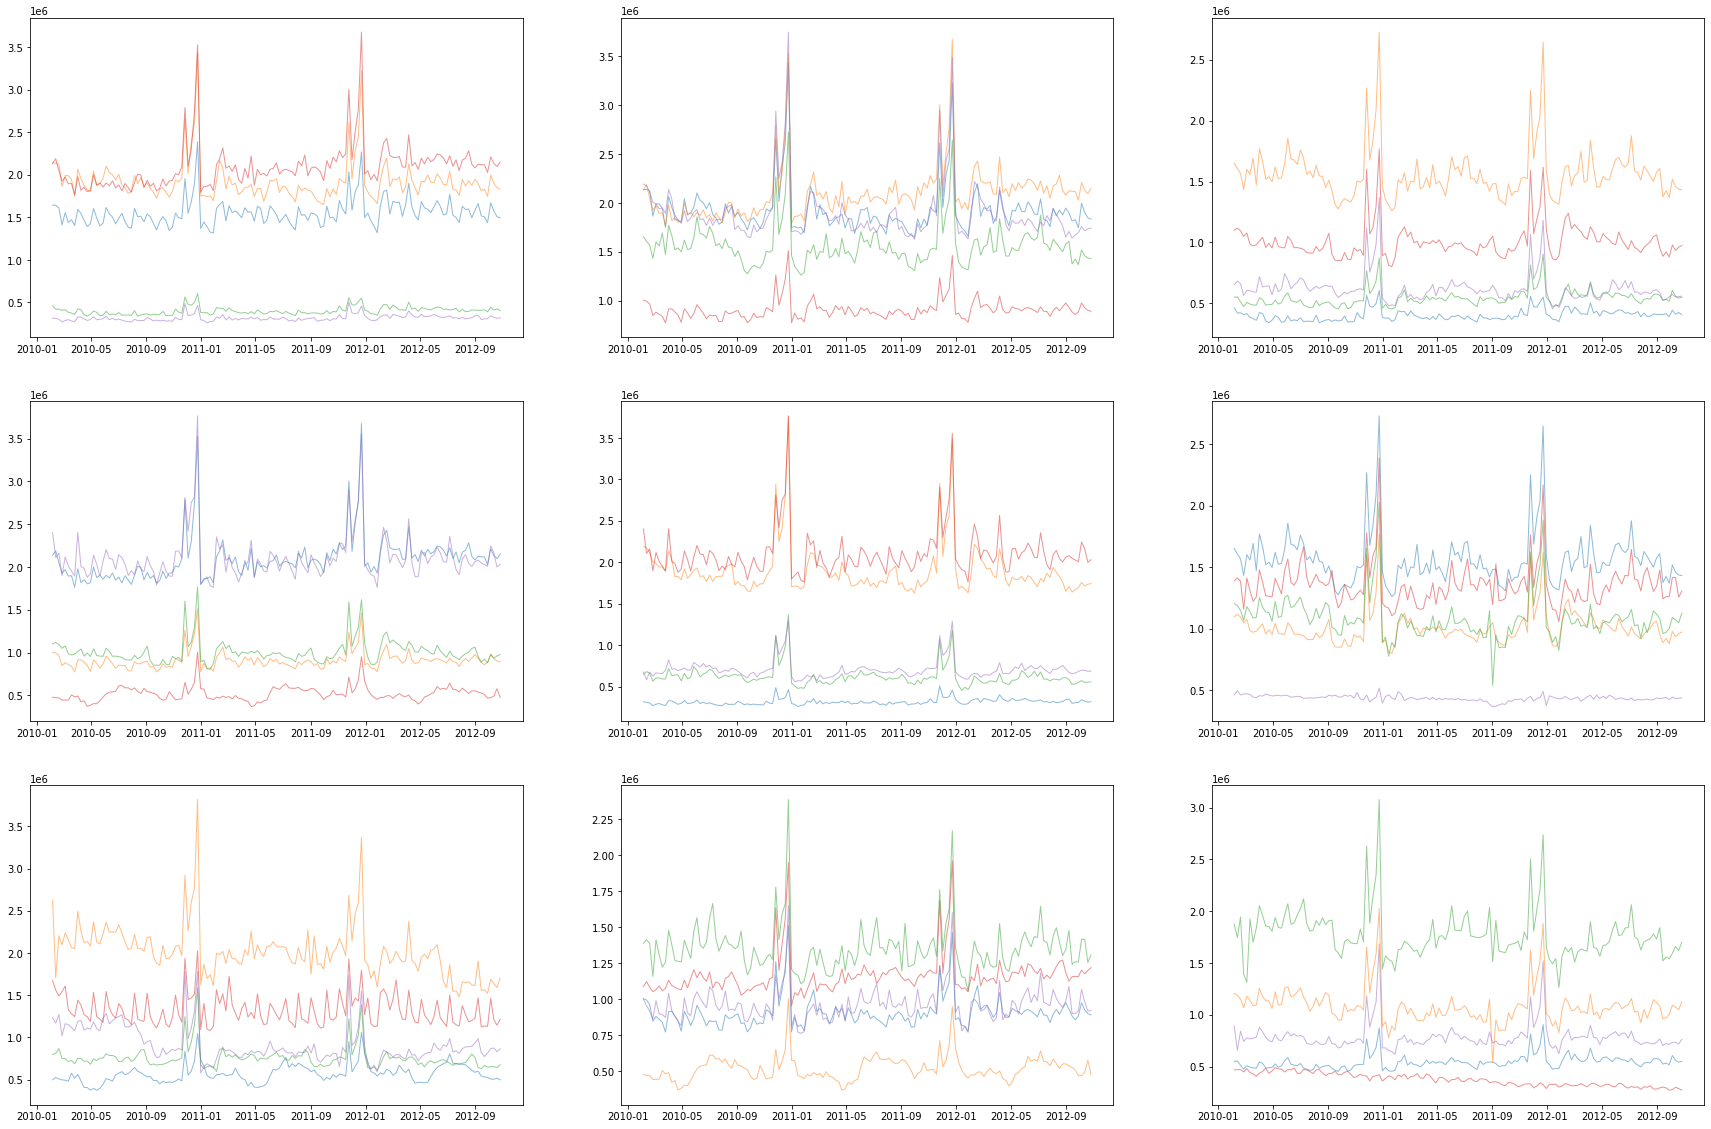

In [37]:
#plots das vendas por loja ao longo do tempo
plt.figure(figsize=(30,20))
#dividindo em 9 plots com 5 loja cada
for i in range(1,10):   
    for j in range(1,6):   
        plt.subplot(3,3,i)
        plt.plot(dados_totais["Date"],dados_totais[i*j],lw=1,alpha=0.5)
del dados_totais,data

* Podemos perceber que os picos de vendas se concentra no final do ano (thanksgivin/blackfriday e natal) e, apesar da maioria das lojas apresentar este pico, cada uma é afetada de uma forma diferente, e há alugumas que não são afetadas por estas datas
* Parece que as lojas que mais vendem são mais afetadas pelos evento de final de ano

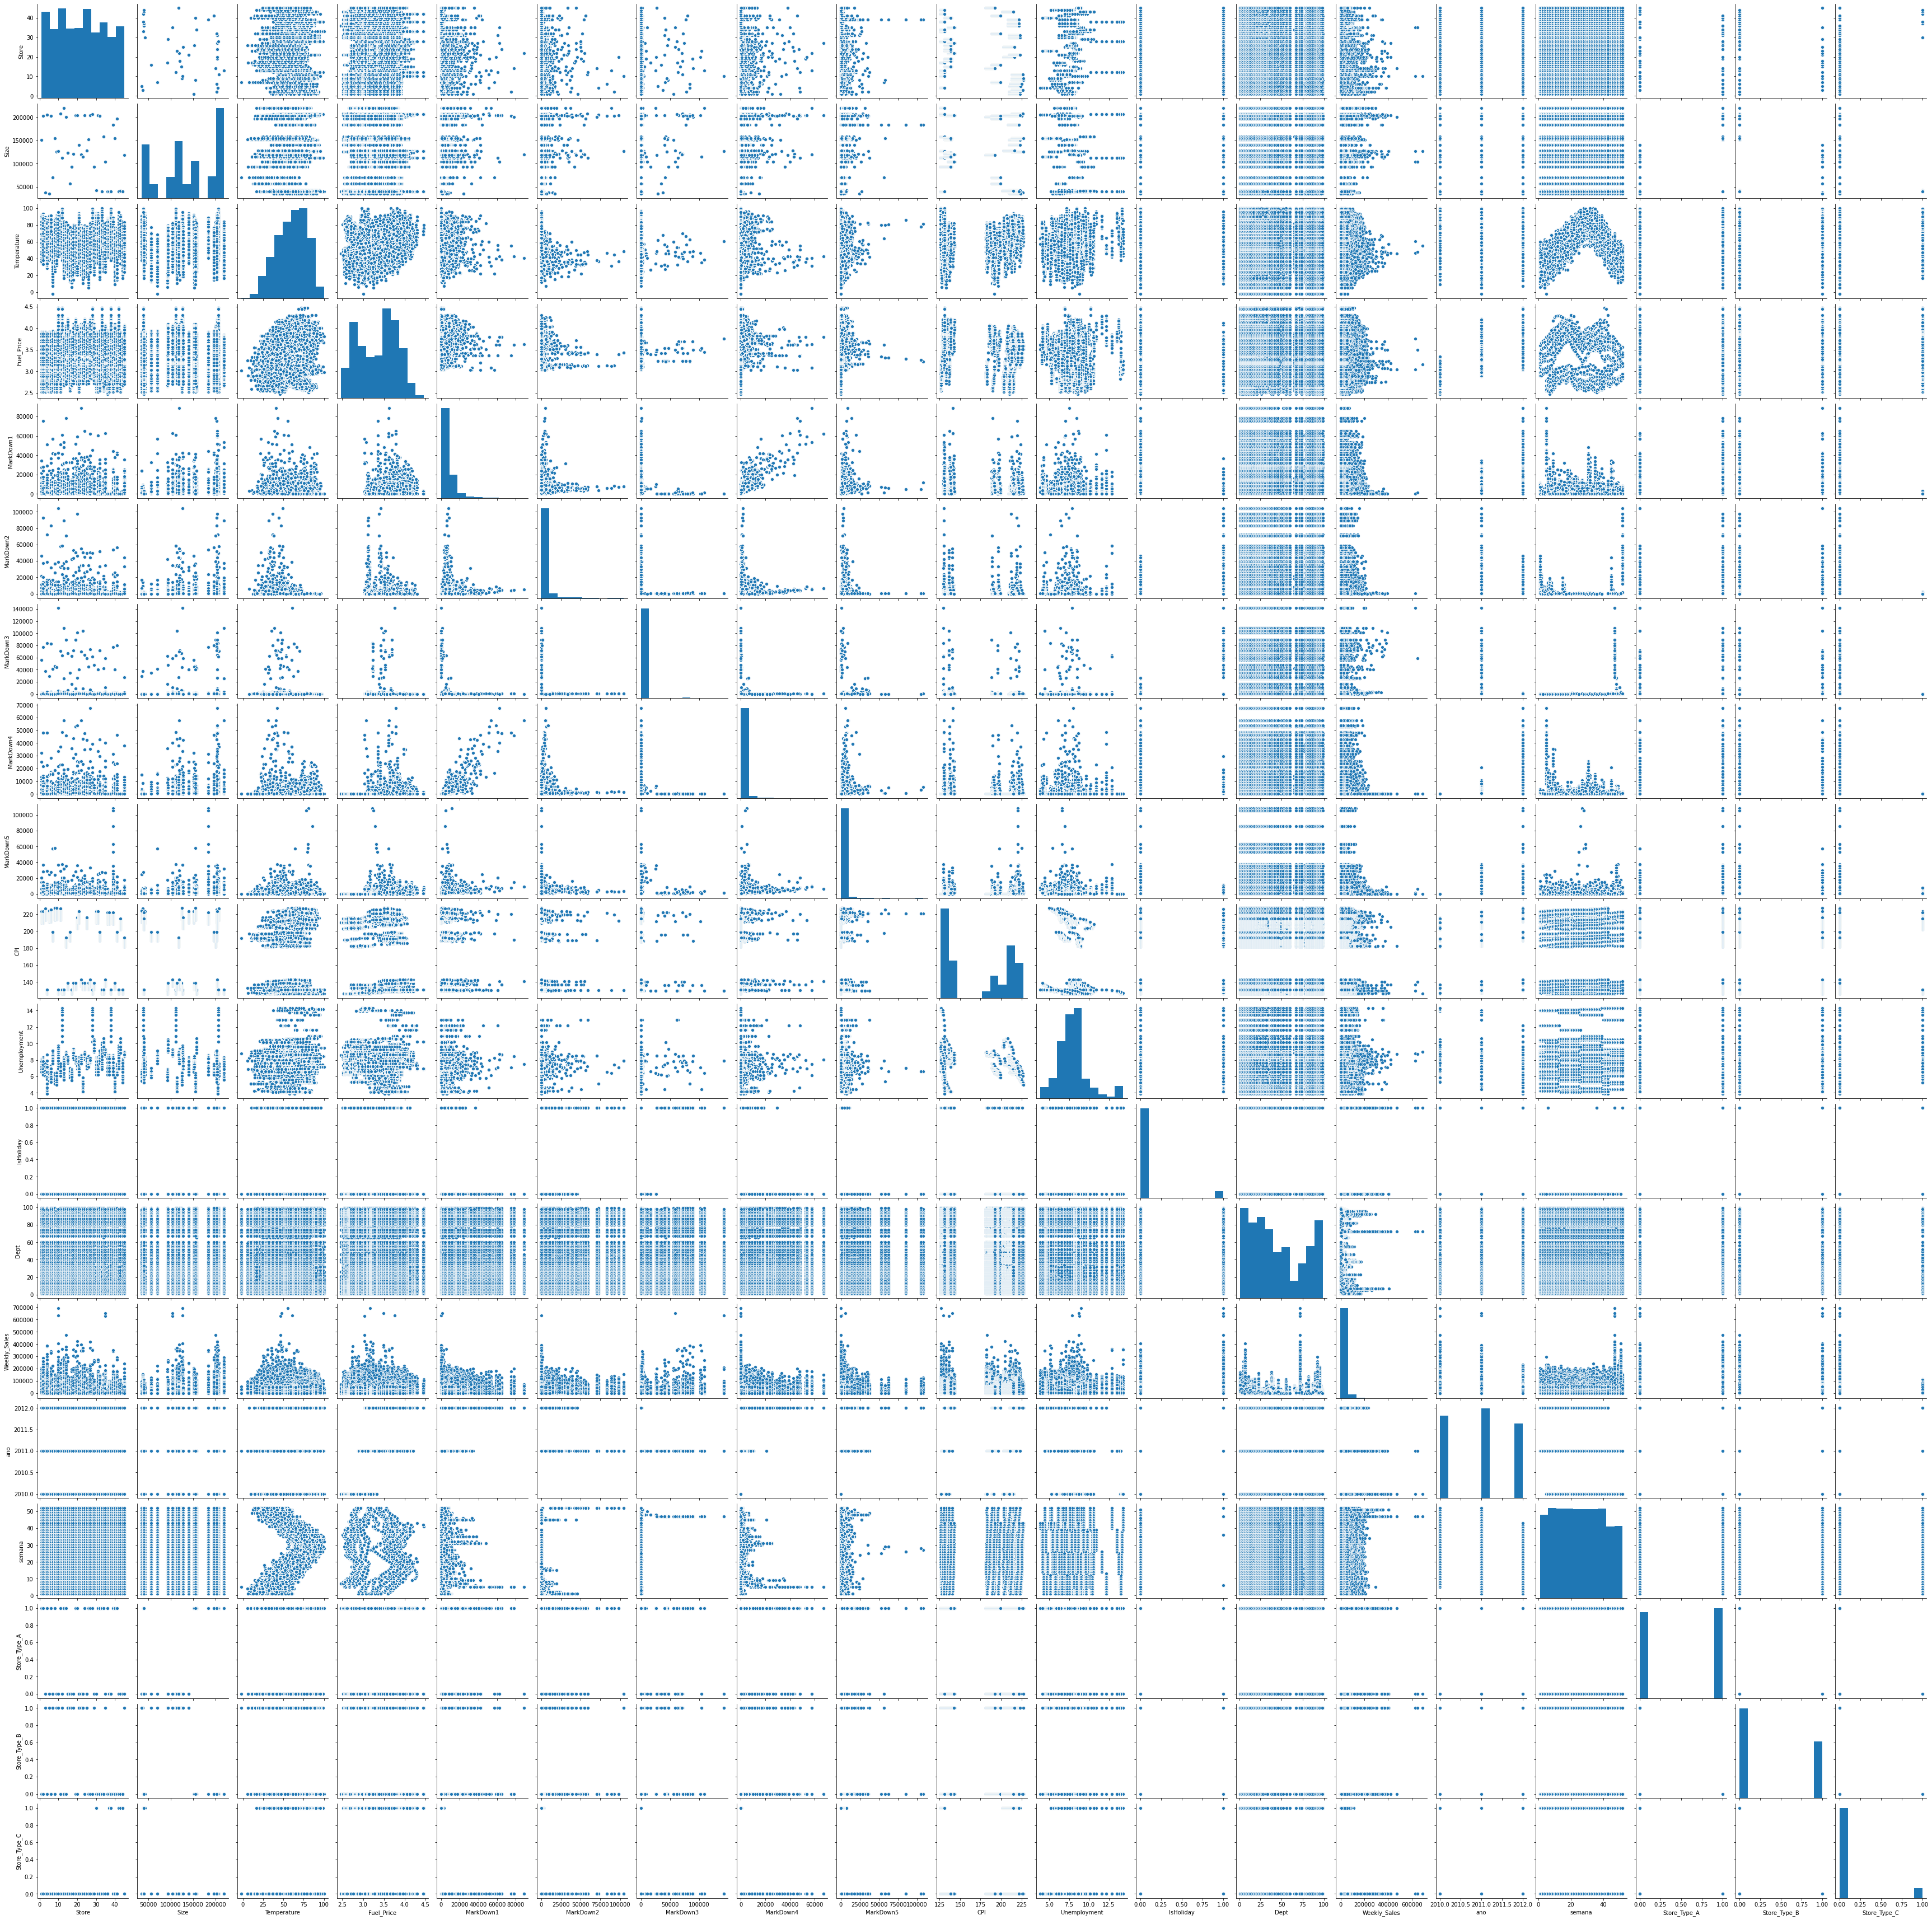

In [39]:
#pairplot, para uma primeira visão geral
sns.pairplot(treino_dados_totais)

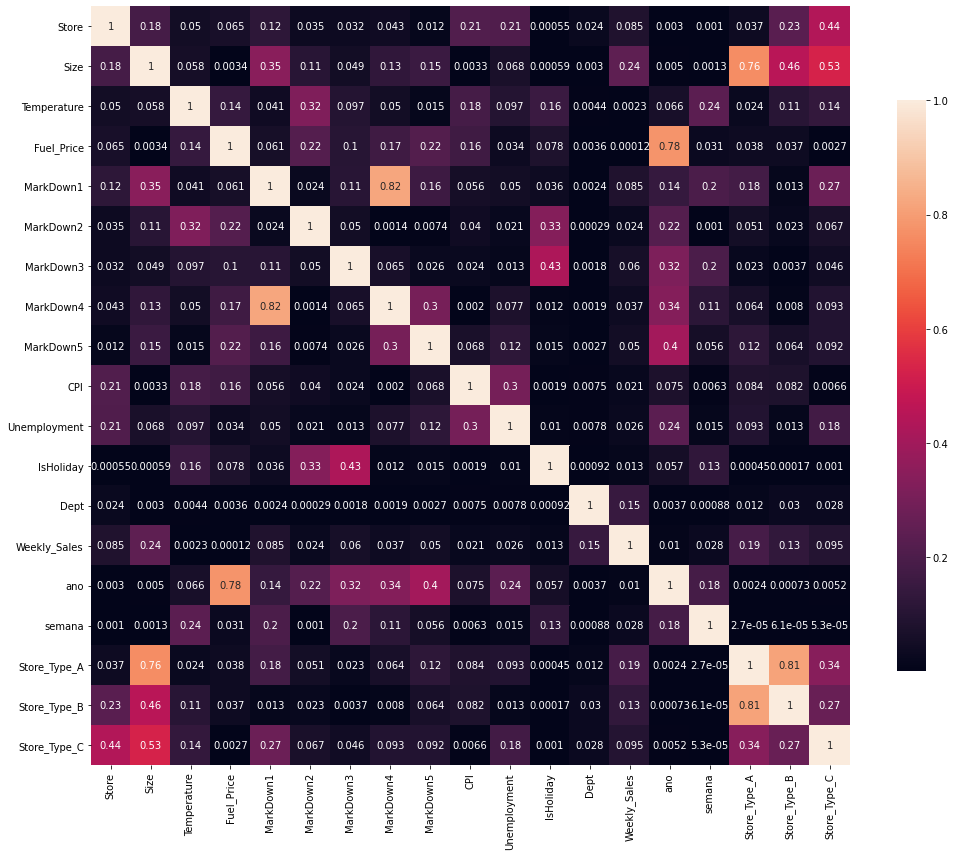

In [38]:
#heatmap
correl=treino_dados_totais.corr().abs()
plt.figure(figsize=(17,15))
sns.heatmap(correl,square=True,annot=True,cbar_kws={"shrink":0.7})

Text(0, 0.5, 'Vendas')

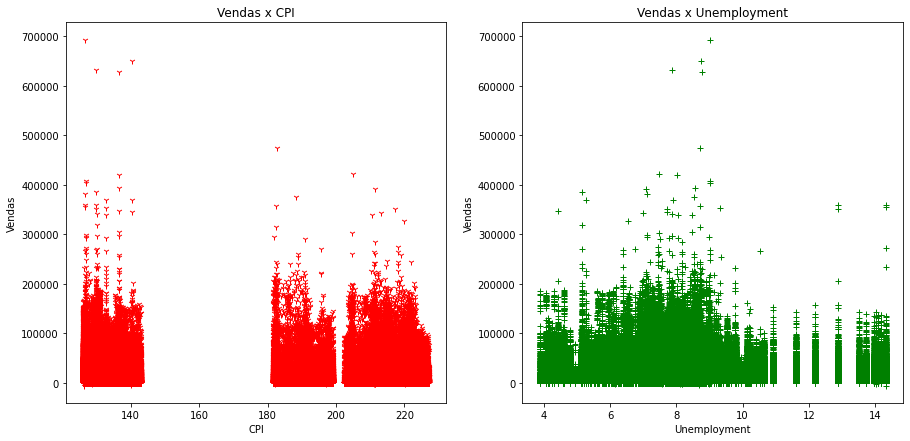

In [40]:
#investigando os dados nulos:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,7))
ax[0].scatter(treino_dados_totais["CPI"],treino_dados_totais["Weekly_Sales"],color="red",marker="1",lw=1)
ax[1].scatter(treino_dados_totais["Unemployment"],treino_dados_totais["Weekly_Sales"],color="green",marker="+",lw=1)
ax[0].set_title("Vendas x CPI")
ax[1].set_title("Vendas x Unemployment")
ax[0].set_xlabel("CPI")
ax[0].set_ylabel("Vendas")
ax[1].set_xlabel("Unemployment")
ax[1].set_ylabel("Vendas")

# > > **Interpretações sobre os dados**

1. Primeiramente, podemos ver correlaçãoes muito fortes entre ano e fuel_price 
2. Os markdowns 4 e 1, idem 
3. Os markdowns 2 e 3 possuem uma correlação com a presença de feriados e com o ano
4. A ordem da correlação das vendas com a temperatura é de 10e-3 (única nesta ordem de grandeza além do preço do combustível)
5. O markdown 1 possui uma correlação relativa com o tamanho da loja
6. Há um gap muito grande nos dados de CPI 
7. Pode-se perceber que os dados faltantes de desemprego estão apenas grupo de teste

**Decisões:**
* Como a correlação de vendas com fuel price é muito pequena e é menor que a com ano, vamos remover o preço do combustível (além do fato de ser necessário manter o ano para diferenciar as vendas mensais);
* Como o markdown 1 possui correlações com o tamanho da loja e com o 4, vamos removê-lo para não haver overfitting;
* Vamos remover também os markdowns 2 e 3, pois sua correlação com as vendas é baixa e eles possuem correlação com os feriados e com o ano;
* Remoção também do CPI, pois além do gap, a correlação é baixa;
* Por fim, podemos remover a temperatura, pela baixa correlação com as vendas

In [3]:
teste_dados_totais.drop(["Fuel_Price","MarkDown1","MarkDown2","MarkDown3","Temperature","CPI"],axis=1,inplace=True)
treino_dados_totais.drop(["Fuel_Price","MarkDown1","MarkDown2","MarkDown3","Temperature","CPI"],axis=1,inplace=True)

#### *Para decidir como preencher o desemprego, vamos avaliar sua evolução no tempo:*

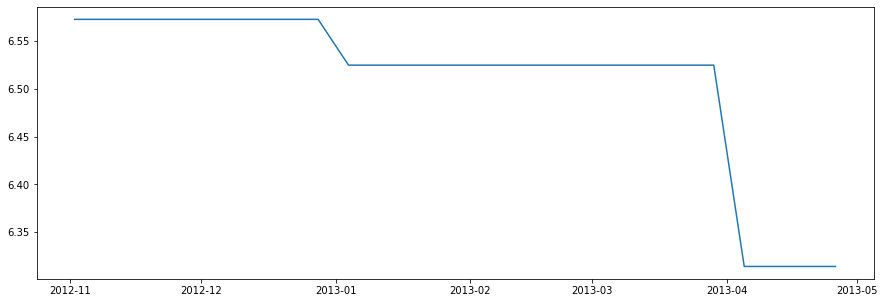

In [42]:
#plot ao longo do tempo
temp=teste_dados_totais[teste_dados_totais["Store"]==1].groupby(["Date"]).mean()
temp.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.plot(temp["Date"],temp["Unemployment"])
del temp   #liberando memória

In [43]:
#pegando a média e o desvio pradrão dos dados de desemprego no perídodo
print("Média =",teste_dados_totais[teste_dados_totais["Unemployment"].isna()==False].groupby(["Date"]).mean()["Unemployment"].mean())
print("Desvio Padrão =",teste_dados_totais[teste_dados_totais["Unemployment"].isna()==False].groupby(["Date"]).mean()["Unemployment"].std())

Média = 6.868474963966885
Desvio Padrão = 0.07917846238855557


* Pode-se perceber que, antes dos dados nulos, o desemprego parece fica constante logo após uma queda. Portanto, faz sentido que se faça um fillna(ffill), visto que houve uma queda recente
* Além disto, como o desvio padrão é baixo, esta aproximação é valida

In [4]:
teste_dados_totais["Unemployment"].fillna(method="ffill",inplace=True) 

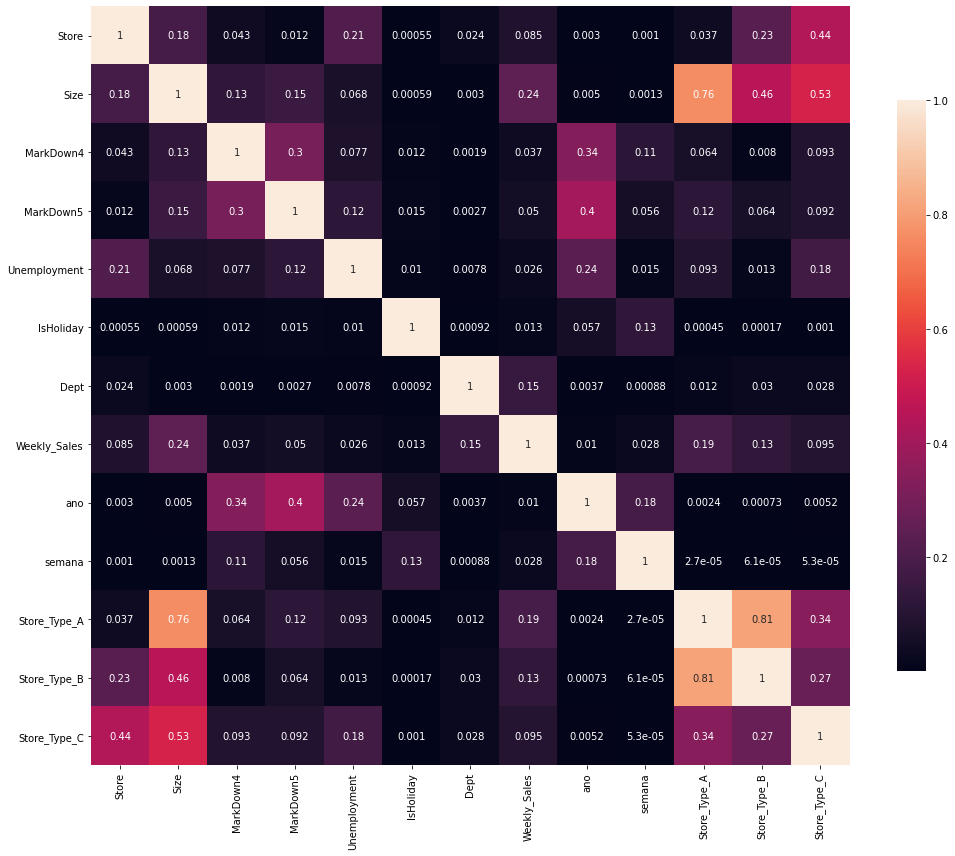

In [45]:
#um novo plot de correlações, após as alterações e deleções de colunas
correl=treino_dados_totais.corr().abs()
plt.figure(figsize=(17,15))
sns.heatmap(correl,square=True,annot=True,cbar_kws={"shrink":0.7})

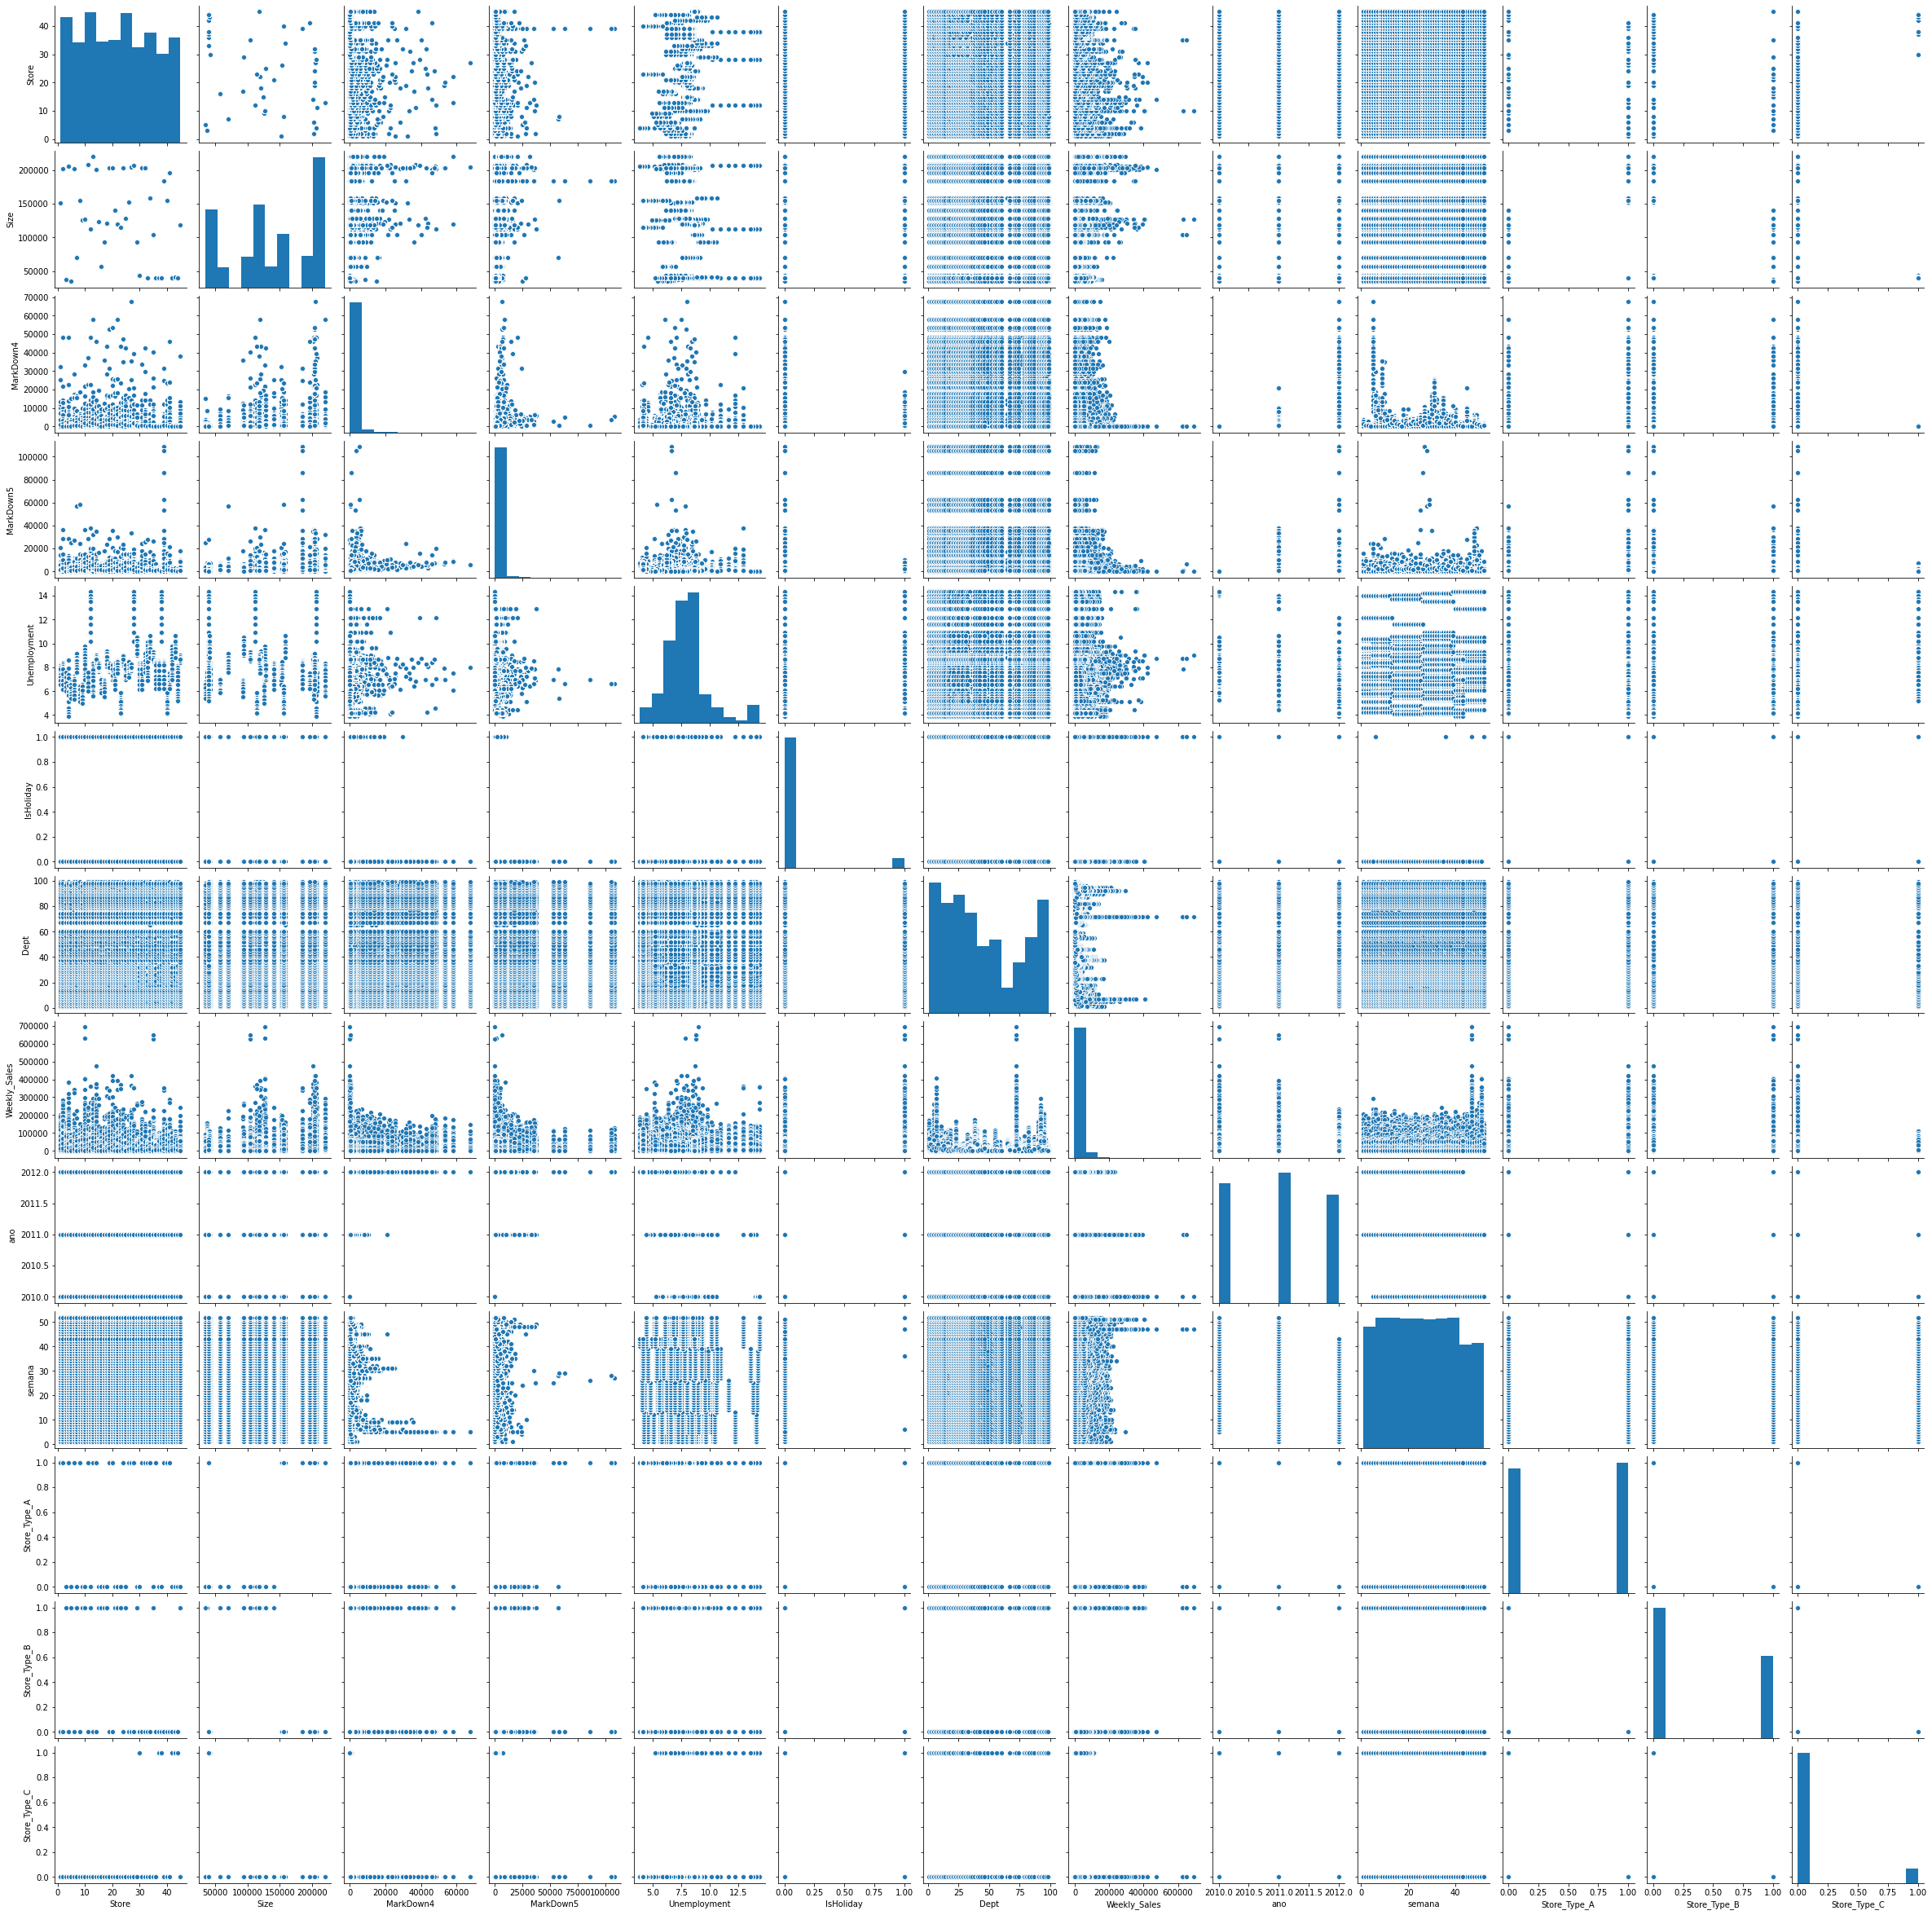

In [46]:
#outro pairplot, para ficar mais claro
sns.pairplot(treino_dados_totais)

# > > **Processo de treinamento e teste**

Para escolher um modelo, farei um teste entre alguns modelos de previsão e comparar o erro deles (weighted mean absolute error -wmae-, indicado na apresentação do problema) entre teste e treino. Como não temos as respostas do dataset "test", eu vou separar os dados de treino em dados_treino e dados_teste com o train_test_split para econtrar o melhor método

Como o passar das semanas pode ser acompanhado com as colunas de "semana" e "ano", para esta parte podemos retirar a coluna "Date"



In [5]:
#removendo a data
teste_final=teste_dados_totais.drop("Date",axis=1)
teste_final.sort_values(by=["Store","Dept"],inplace=True)  #para ficar do formato correto da submission
treino_final=treino_dados_totais.drop("Date",axis=1)

#criando a função WMAE, como indicado no enunciado
def WMAE(df, real, pred):
    peso = df["IsHoliday"].apply(lambda x: 5 if x else 1)
    return np.round(np.sum(peso*abs(real-pred))/(np.sum(peso)), 2)

In [6]:
#os modelos de previsão utilizados serão:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(
    treino_final.drop("Weekly_Sales",axis=1) , treino_final["Weekly_Sales"] , test_size=0.3, random_state=42)


### * Uma rodada preliminar exploratória destes métodos apenas com os parâmetros padrões, forneceu o seguinte resultado:

* WMAE do Random Forest = 01665.60, em 02min30s
* WMAE do MLP =           12719.01, em 11min40s
* WMAE do KNN =           09981.09, em 00min45s
* WMAE do SVM =           13799.42, em 45min20s


### Foi tentada uma busca com o Gridsearch. Porém, devido ao elevado tempo para se calcular (principalmente devido ao fold) e o fato de o notebook não rodar por mais de 9 horas, foi feita uma busca manual dos parâmetros das redes

* ###### parametros que seriam utilizados no grisearch, mas foram testados manualmente

1. param_rf = { 
    'n_estimators':      [10,50,100,500],
    'max_depth' :        [10,50,100],
    "min_samples_leaf" : [1,2,5],
    "min_samples_split": [2,5,10]}

2. param_knn = {
    "n_neighbors":[1,3,5,7,10,15,50,100,200,500],
    "weights":    ["uniform", "distance"]}

3. param_MLP = {
    'hidden_layer_sizes':[(50,),(100,),(200,),(500,)] }
    
4. param_SVM = {
    'C':[0.1,1,10,100,1000],
    "gamma":[0.0001,0.001,0.01,0.1,1]}
    


### Sobre o estes testes, temos algumas considerações:
* Foram trabalhados os parâmetros que mais comumente se altera ao treinar estes métodos
* Não foi executada a busca nos parâmetros do SVM, pois por ser o método que exige mais computacionalmente, não houve tempo hábil. Além disto, sua execução com parâmetros padrões foi a que forneceu o maior erro, e os resultados dos outros testes sugerem que a melhora após os mesmos não é grande o suficiente para fazer com que seu erro melhore a ponto de ser o menor.
* Após finalizar o trabalho, eu submeti minha resposta ao kaggle, e o erro calculado pelo site foi de 3157.12325, o que comparada às outras submissões está acima da média
* No entanto, caso este resutado não fosse satisfatório ainda e o tempo permitisse (no caso de um projeto real), eu utilizaria uma otimização por enxame de partículas (PSO-particle swarm optimization) para trabalhar os parâmetros e econtrar o melhor de cada um

In [ ]:
#loop para os parâmetros da Random Forest:
print ("Método = RF")
min_erro_rf=1665
for n in [200,500,1000]:
    for depth in [10,50,100]:
        for leaf in [1,2,5]:
            for split in [2,5,10]:
                rf=RandomForestRegressor(n_estimators=n,
                                         max_depth=depth,
                                         min_samples_split=split,
                                         min_samples_leaf=leaf,
                                         random_state=42)
                rf.fit(xtrain,ytrain)
                pred=rf.predict(xtest)
                erro=WMAE(xtest,ytest,pred)
                print("n=",n,",depth=",depth,",leaf=",leaf,",split=",split)
                print("Erro =",erro)
                if erro<min_erro_rf:
                    min_erro_rf=erro
                    melhor_param_rf=[n,depth,leaf,split]
print ("Menor erro=",min_erro_rf)
print ("Melhores parametros=",melhor_param_rf)

### **Como este loop demora muito, estou colando aqui embaixo as saídas, para melhor visualização**

* n= 10 ,depth= 10 ,leaf= 1 ,split= 2
* Erro = 4445.62
* n= 10 ,depth= 10 ,leaf= 1 ,split= 5
* Erro = 4443.48
* n= 10 ,depth= 10 ,leaf= 1 ,split= 10
* Erro = 4439.91
* n= 10 ,depth= 10 ,leaf= 2 ,split= 2
* Erro = 4443.01
* n= 10 ,depth= 10 ,leaf= 2 ,split= 5
* Erro = 4442.92
* n= 10 ,depth= 10 ,leaf= 2 ,split= 10
* Erro = 4443.2
* n= 10 ,depth= 10 ,leaf= 5 ,split= 2
* Erro = 4438.54
* n= 10 ,depth= 10 ,leaf= 5 ,split= 5
* Erro = 4438.54
* n= 10 ,depth= 10 ,leaf= 5 ,split= 10
* Erro = 4438.54
* n= 10 ,depth= 50 ,leaf= 1 ,split= 2
* Erro = 1751.67
* n= 10 ,depth= 50 ,leaf= 1 ,split= 5
* Erro = 1749.95
* n= 10 ,depth= 50 ,leaf= 1 ,split= 10
* Erro = 1784.96
* n= 10 ,depth= 50 ,leaf= 2 ,split= 2
* Erro = 1751.74
* n= 10 ,depth= 50 ,leaf= 2 ,split= 5
* Erro = 1752.31
* n= 10 ,depth= 50 ,leaf= 2 ,split= 10
* Erro = 1784.49
* n= 10 ,depth= 50 ,leaf= 5 ,split= 2
* Erro = 1831.69
* n= 10 ,depth= 50 ,leaf= 5 ,split= 5
* Erro = 1831.69
* n= 10 ,depth= 50 ,leaf= 5 ,split= 10
* Erro = 1831.69
* n= 10 ,depth= 100 ,leaf= 1 ,split= 2
* Erro = 1751.67
* n= 10 ,depth= 100 ,leaf= 1 ,split= 5
* Erro = 1749.95
* n= 10 ,depth= 100 ,leaf= 1 ,split= 10
* Erro = 1784.96
* n= 10 ,depth= 100 ,leaf= 2 ,split= 2
* Erro = 1751.74
* n= 10 ,depth= 100 ,leaf= 2 ,split= 5
* Erro = 1752.31
* n= 10 ,depth= 100 ,leaf= 2 ,split= 10
* Erro = 1784.49
* n= 10 ,depth= 100 ,leaf= 5 ,split= 2
* Erro = 1831.69
* n= 10 ,depth= 100 ,leaf= 5 ,split= 5
* Erro = 1831.69
* n= 10 ,depth= 100 ,leaf= 5 ,split= 10
* Erro = 1831.69
* n= 20 ,depth= 10 ,leaf= 1 ,split= 2
* Erro = 4394.61
* n= 20 ,depth= 10 ,leaf= 1 ,split= 5
* Erro = 4395.11
* n= 20 ,depth= 10 ,leaf= 1 ,split= 10
* Erro = 4396.44
* n= 20 ,depth= 10 ,leaf= 2 ,split= 2
* Erro = 4395.93
* n= 20 ,depth= 10 ,leaf= 2 ,split= 5
* Erro = 4396.49
* n= 20 ,depth= 10 ,leaf= 2 ,split= 10
* Erro = 4397.94
* n= 20 ,depth= 10 ,leaf= 5 ,split= 2
* Erro = 4392.81
* n= 20 ,depth= 10 ,leaf= 5 ,split= 5
* Erro = 4392.81
* n= 20 ,depth= 10 ,leaf= 5 ,split= 10
* Erro = 4392.81
* n= 20 ,depth= 50 ,leaf= 1 ,split= 2
* Erro = 1695.03
* n= 20 ,depth= 50 ,leaf= 1 ,split= 5
* Erro = 1697.35
* n= 20 ,depth= 50 ,leaf= 1 ,split= 10
* Erro = 1745.12
* n= 20 ,depth= 50 ,leaf= 2 ,split= 2
* Erro = 1709.94
* n= 20 ,depth= 50 ,leaf= 2 ,split= 5
* Erro = 1711.55
* n= 20 ,depth= 50 ,leaf= 2 ,split= 10
* Erro = 1749.92
* n= 20 ,depth= 50 ,leaf= 5 ,split= 2
* Erro = 1802.55
* n= 20 ,depth= 50 ,leaf= 5 ,split= 5
* Erro = 1802.55
* n= 20 ,depth= 50 ,leaf= 5 ,split= 10
* Erro = 1802.55
* n= 20 ,depth= 100 ,leaf= 1 ,split= 2
* Erro = 1695.03
* n= 20 ,depth= 100 ,leaf= 1 ,split= 5
* Erro = 1697.35
* n= 20 ,depth= 100 ,leaf= 1 ,split= 10
* Erro = 1745.12
* n= 20 ,depth= 100 ,leaf= 2 ,split= 2
* Erro = 1709.94
* n= 20 ,depth= 100 ,leaf= 2 ,split= 5
* Erro = 1711.55
* n= 20 ,depth= 100 ,leaf= 2 ,split= 10
* Erro = 1749.92
* n= 20 ,depth= 100 ,leaf= 5 ,split= 2
* Erro = 1802.55
* n= 20 ,depth= 100 ,leaf= 5 ,split= 5
* Erro = 1802.55
* n= 20 ,depth= 100 ,leaf= 5 ,split= 10
* Erro = 1802.55
* n= 50 ,depth= 10 ,leaf= 1 ,split= 2
* Erro = 4393.93
* n= 50 ,depth= 10 ,leaf= 1 ,split= 5
* Erro = 4394.46
* n= 50 ,depth= 10 ,leaf= 1 ,split= 10
* Erro = 4394.64
* n= 50 ,depth= 10 ,leaf= 2 ,split= 2
* Erro = 4394.7
* n= 50 ,depth= 10 ,leaf= 2 ,split= 5
* Erro = 4395.46
* n= 50 ,depth= 10 ,leaf= 2 ,split= 10
* Erro = 4394.56
* n= 50 ,depth= 10 ,leaf= 5 ,split= 2
* Erro = 4391.7
* n= 50 ,depth= 10 ,leaf= 5 ,split= 5
* Erro = 4391.7
* n= 50 ,depth= 10 ,leaf= 5 ,split= 10
* Erro = 4391.7
* n= 50 ,depth= 50 ,leaf= 1 ,split= 2
* Erro = 1674.33
* n= 50 ,depth= 50 ,leaf= 1 ,split= 5
* Erro = 1681.07
* n= 50 ,depth= 50 ,leaf= 1 ,split= 10
* Erro = 1727.63
* n= 50 ,depth= 50 ,leaf= 2 ,split= 2
* Erro = 1695.32
* n= 50 ,depth= 50 ,leaf= 2 ,split= 5
* Erro = 1697.83
* n= 50 ,depth= 50 ,leaf= 2 ,split= 10
* Erro = 1733.74
* n= 50 ,depth= 50 ,leaf= 5 ,split= 2
* Erro = 1793.25
* n= 50 ,depth= 50 ,leaf= 5 ,split= 5
* Erro = 1793.25
* n= 50 ,depth= 50 ,leaf= 5 ,split= 10
* Erro = 1793.25
* n= 50 ,depth= 100 ,leaf= 1 ,split= 2
* Erro = 1674.33
* n= 50 ,depth= 100 ,leaf= 1 ,split= 5
* Erro = 1681.07
* n= 50 ,depth= 100 ,leaf= 1 ,split= 10
* Erro = 1727.63
* n= 50 ,depth= 100 ,leaf= 2 ,split= 2
* Erro = 1695.32
* n= 50 ,depth= 100 ,leaf= 2 ,split= 5
* Erro = 1697.83
* n= 50 ,depth= 100 ,leaf= 2 ,split= 10
* Erro = 1733.74
* n= 50 ,depth= 100 ,leaf= 5 ,split= 2
* Erro = 1793.25
* n= 50 ,depth= 100 ,leaf= 5 ,split= 5
* Erro = 1793.25
* n= 50 ,depth= 100 ,leaf= 5 ,split= 10
* Erro = 1793.25
* n= 100 ,depth= 10 ,leaf= 1 ,split= 2
* Erro = 4360.09
* n= 100 ,depth= 10 ,leaf= 1 ,split= 5
* Erro = 4359.9
* n= 100 ,depth= 10 ,leaf= 1 ,split= 10
* Erro = 4359.62
* n= 100 ,depth= 10 ,leaf= 2 ,split= 2
* Erro = 4361.26
* n= 100 ,depth= 10 ,leaf= 2 ,split= 5
* Erro = 4361.95
* n= 100 ,depth= 10 ,leaf= 2 ,split= 10
* Erro = 4359.7
* n= 100 ,depth= 10 ,leaf= 5 ,split= 2
* Erro = 4358.31
* n= 100 ,depth= 10 ,leaf= 5 ,split= 5
* Erro = 4358.31
* n= 100 ,depth= 10 ,leaf= 5 ,split= 10
* Erro = 4358.31
* n= 100 ,depth= 50 ,leaf= 1 ,split= 2
* Erro = 1667.97
* n= 100 ,depth= 50 ,leaf= 1 ,split= 5
* Erro = 1675.45
* n= 100 ,depth= 50 ,leaf= 1 ,split= 10
* Erro = 1721.37
* n= 100 ,depth= 50 ,leaf= 2 ,split= 2
* Erro = 1690.61
* n= 100 ,depth= 50 ,leaf= 2 ,split= 5
* Erro = 1692.59
* n= 100 ,depth= 50 ,leaf= 2 ,split= 10
* Erro = 1728.53
* n= 100 ,depth= 50 ,leaf= 5 ,split= 2
* Erro = 1784.92
* n= 100 ,depth= 50 ,leaf= 5 ,split= 5
* Erro = 1784.92
* n= 100 ,depth= 50 ,leaf= 5 ,split= 10
* Erro = 1784.92
* n= 100 ,depth= 100 ,leaf= 1 ,split= 2
* Erro = 1667.97
* n= 100 ,depth= 100 ,leaf= 1 ,split= 5
* Erro = 1675.45
* n= 100 ,depth= 100 ,leaf= 1 ,split= 10
* Erro = 1721.37
* n= 100 ,depth= 100 ,leaf= 2 ,split= 2
* Erro = 1690.61
* n= 100 ,depth= 100 ,leaf= 2 ,split= 5
* Erro = 1692.59
* n= 100 ,depth= 100 ,leaf= 2 ,split= 10
* Erro = 1728.53
* n= 100 ,depth= 100 ,leaf= 5 ,split= 2
* Erro = 1784.92
* n= 100 ,depth= 100 ,leaf= 5 ,split= 5
* Erro = 1784.92
* n= 100 ,depth= 100 ,leaf= 5 ,split= 10
* Erro = 1784.92
* n= 200 ,depth= 10 ,leaf= 1 ,split= 2
* Erro = 4354.83
* n= 200 ,depth= 10 ,leaf= 1 ,split= 2
* Erro = 4354.83
* n= 200 ,depth= 10 ,leaf= 1 ,split= 5
* Erro = 4354.79
* n= 200 ,depth= 10 ,leaf= 1 ,split= 10
* Erro = 4354.76
* n= 200 ,depth= 10 ,leaf= 2 ,split= 2
* Erro = 4357.04
* n= 200 ,depth= 10 ,leaf= 2 ,split= 5
* Erro = 4356.85
* n= 200 ,depth= 10 ,leaf= 2 ,split= 10
* Erro = 4355.98
* n= 200 ,depth= 10 ,leaf= 5 ,split= 2
* Erro = 4353.66
* n= 200 ,depth= 10 ,leaf= 5 ,split= 5
* Erro = 4353.66
* n= 200 ,depth= 10 ,leaf= 5 ,split= 10
* Erro = 4353.66
* n= 200 ,depth= 50 ,leaf= 1 ,split= 2
* Erro = 1661.84
* n= 200 ,depth= 50 ,leaf= 1 ,split= 5
* Erro = 1670.05
* n= 200 ,depth= 50 ,leaf= 1 ,split= 10
* Erro = 1717.74
* n= 200 ,depth= 50 ,leaf= 2 ,split= 2
* Erro = 1686.37
* n= 200 ,depth= 50 ,leaf= 2 ,split= 5
* Erro = 1688.12
* n= 200 ,depth= 50 ,leaf= 2 ,split= 10
* Erro = 1726.07
* n= 200 ,depth= 50 ,leaf= 5 ,split= 2
* Erro = 1782.99
* n= 200 ,depth= 50 ,leaf= 5 ,split= 5
* Erro = 1782.99
* n= 200 ,depth= 50 ,leaf= 5 ,split= 10
* Erro = 1782.99
* n= 200 ,depth= 100 ,leaf= 1 ,split= 2
* Erro = 1661.84
* n= 200 ,depth= 100 ,leaf= 1 ,split= 5
* Erro = 1670.05
* n= 200 ,depth= 100 ,leaf= 1 ,split= 10
* Erro = 1717.74
* n= 200 ,depth= 100 ,leaf= 2 ,split= 2
* Erro = 1686.37
* n= 200 ,depth= 100 ,leaf= 2 ,split= 5
* Erro = 1688.12
* n= 200 ,depth= 100 ,leaf= 2 ,split= 10
* Erro = 1726.07
* n= 200 ,depth= 100 ,leaf= 5 ,split= 2
* Erro = 1782.99
* n= 200 ,depth= 100 ,leaf= 5 ,split= 5
* Erro = 1782.99
* n= 200 ,depth= 100 ,leaf= 5 ,split= 10
* Erro = 1782.99
* n= 500 ,depth= 10 ,leaf= 1 ,split= 2
* Erro = 4362.69
* n= 500 ,depth= 10 ,leaf= 1 ,split= 5
* Erro = 4362.8
* n= 500 ,depth= 10 ,leaf= 1 ,split= 10
* Erro = 4362.53
* n= 500 ,depth= 10 ,leaf= 2 ,split= 2
* Erro = 4364.1
* n= 500 ,depth= 10 ,leaf= 2 ,split= 5
* Erro = 4364.15
* n= 500 ,depth= 10 ,leaf= 2 ,split= 10
* Erro = 4363.1
* n= 500 ,depth= 10 ,leaf= 5 ,split= 2
* Erro = 4361.21
* n= 500 ,depth= 10 ,leaf= 5 ,split= 5
* Erro = 4361.21
* n= 500 ,depth= 10 ,leaf= 5 ,split= 10
* Erro = 4361.21
* n= 500 ,depth= 50 ,leaf= 1 ,split= 2
* Erro = 1658.91
* n= 500 ,depth= 50 ,leaf= 1 ,split= 5
* Erro = 1668.19
* n= 500 ,depth= 50 ,leaf= 1 ,split= 10
* Erro = 1715.31
* n= 500 ,depth= 50 ,leaf= 2 ,split= 2
* Erro = 1683.49
* n= 500 ,depth= 50 ,leaf= 2 ,split= 5
* Erro = 1685.35
* n= 500 ,depth= 50 ,leaf= 2 ,split= 10
* Erro = 1722.99
* n= 500 ,depth= 50 ,leaf= 5 ,split= 2
* Erro = 1778.85
* n= 500 ,depth= 50 ,leaf= 5 ,split= 5
* Erro = 1778.85
* n= 500 ,depth= 50 ,leaf= 5 ,split= 10
* Erro = 1778.85
* n= 500 ,depth= 100 ,leaf= 1 ,split= 2
* Erro = 1658.91
* n= 500 ,depth= 100 ,leaf= 1 ,split= 5
* Erro = 1668.19
* n= 500 ,depth= 100 ,leaf= 1 ,split= 10
* Erro = 1715.31
* n= 500 ,depth= 100 ,leaf= 2 ,split= 2
* Erro = 1683.49
* n= 500 ,depth= 100 ,leaf= 2 ,split= 5
* Erro = 1685.35
* n= 500 ,depth= 100 ,leaf= 2 ,split= 10
* Erro = 1722.99
* n= 500 ,depth= 100 ,leaf= 5 ,split= 2
* Erro = 1778.85
* n= 500 ,depth= 100 ,leaf= 5 ,split= 5
* Erro = 1778.85
* n= 500 ,depth= 100 ,leaf= 5 ,split= 10
* Erro = 1778.85
* Menor erro= 1665
* Melhores parametros= [500, 100, 1, 2]

In [ ]:
#loop para os parâmetros do KNN:
print ("Método = KNN")
min_erro_knn=9981
for n in [1,3,5,7,10,15,50,100,200,500]:
    for weights in ["uniform", "distance"]:
        knn=KNeighborsRegressor(n_neighbors=n,
                               weights=weights,
                               n_jobs=-1)
        knn.fit(xtrain,ytrain)
        pred=knn.predict(xtest)
        erro=WMAE(xtest,ytest,pred)
        print("n=",n,",weights=",weights)
        print("Erro =",erro)
        if erro<min_erro_knn:
            min_erro_knn=erro
            melhor_param_knn=[n,weights]
print ("Menor erro",min_erro_knn)
print ("Melhores parametros=",melhor_param_knn)

### **Como este loop demora muito, estou colando aqui embaixo as saídas, para melhor visualização**
* Método = KNN
* n= 1 ,weights= uniform
* Erro = 11670.44
* n= 1 ,weights= distance
* Erro = 11670.44
* n= 3 ,weights= uniform
* Erro = 9546.54
* n= 3 ,weights= distance
* Erro = 9617.76
* n= 5 ,weights= uniform
* Erro = 9981.09
* n= 5 ,weights= distance
* Erro = 9838.53
* n= 7 ,weights= uniform
* Erro = 10274.7
* n= 7 ,weights= distance
* Erro = 10013.89
* n= 10 ,weights= uniform
* Erro = 10496.43
* n= 10 ,weights= distance
* Erro = 10091.08
* n= 15 ,weights= uniform
* Erro = 10729.01
* n= 15 ,weights= distance
* Erro = 10246.93
* n= 50 ,weights= uniform
* Erro = 11773.26
* n= 50 ,weights= distance
* Erro = 10846.7
* n= 100 ,weights= uniform
* Erro = 12136.81
* n= 100 ,weights= distance
* Erro = 11182.39
* n= 200 ,weights= uniform
* Erro = 12432.31
* n= 200 ,weights= distance
* Erro = 11422.6
* n= 500 ,weights= uniform
* Erro = 12942.75
* n= 500 ,weights= distance
* Erro = 11801.73
* Menor erro 9546.54
* Melhores parametros= [3, 'uniform']

In [ ]:
#loop para os parâmetros da MLP
print("Método = MLP")
min_erro_mlp=12719
for size in [(50,),(100,),(200,),(500,)]:
    nn=MLPRegressor(hidden_layer_sizes=size,
                    random_state=42)
    nn.fit(xtrain,ytrain)
    pred=nn.predict(xtest)
    erro=WMAE(xtest,ytest,pred)
    print("size=",size)
    print("Erro =",erro,"\n\n")
    if erro<min_erro_mlp:
        min_erro_mlp=erro
        melhor_param_mlp=size
print ("Menor erro",min_erro_mlp)
print ("Melhores parametros=",melhor_param_mlp)

### **Como este loop demora muito, estou colando aqui embaixo as saídas, para melhor visualização**
Método = MLP
size= (50,)
Erro = 12613.75 


size= (100,)
Erro = 12406.84 


size= (200,)
Erro = 15345.64 


size= (500,)
Erro = 12791.01 


Menor erro 12406.84
Melhores parametros= (100,)

In [ ]:
#este acabou não sendo rodado
#loop para os parâmetros do SVM
print("Método = SVM")
min_erro_svm=13799
for c in [0.1,1,10,100]:
    for gamma in [0.001,0.01,0.1,1]:
        svm=SVR(C=c,
               gamma=gamma)
        svm.fit(xtrain,ytrain)
        pred=svm.predict(xtest)
        erro=WMAE(xtest,ytest,pred)
        print("size=",size)
        print("Erro =",erro)
        if erro<min_erro_svm:
            min_erro_svm=erro
            melhor_param_svm=size
print ("Menor erro=",min_erro_svm)
print ("Melhores parametros=",melhor_param_svm)

In [ ]:
#fazendo a submissão
#melhor método entre os 4: Random Forest
melhor_param_rf = [500, 100, 1, 2]
rf=RandomForestRegressor(n_estimators=melhor_param_rf[0],
                        max_depth=melhor_param_rf[1],
                        min_samples_leaf=melhor_param_rf[2],
                        min_samples_split=melhor_param_rf[3],
                        random_state=42)
rf.fit(xtrain,ytrain)
previsto=rf.predict(teste_final)
samples["Weekly_Sales"]=previsto
samples.to_csv('submission.csv',index=False)